<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_week14_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_6~7_pg_105~115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06. 모델 저장 및 불러오기**
---

In [16]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련
model.fit(x_train,y_train,
          #검증 세트 지정
          validation_data=(x_test,y_test),
          epochs=10
          )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9672 - accuracy: 0.7895 - val_loss: 0.3300 - val_accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2657 - accuracy: 0.9312 - val_loss: 0.2353 - val_accuracy: 0.9404
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1774 - accuracy: 0.9521 - val_loss: 0.1733 - val_accuracy: 0.9545
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1300 - accuracy: 0.9636 - val_loss: 0.1574 - val_accuracy: 0.9572
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1125 - accuracy: 0.9684 - val_loss: 0.1605 - val_accuracy: 0.9611
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1042 - accuracy: 0.9720 - val_loss: 0.1138 - val_accuracy: 0.9703
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0859 - accuracy: 0.9762 - val_loss: 0.1174 - val_accuracy:

### **6-1 모델을 파일로 저장**

>훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장ㅎ라 수 있음.<br/>
모델을 저장하는 형식은 HDF5 포맷과 SavedModel 포멧 두 가지 존재<br/>
HDF5 파일 형식은 대용량의 데이터를 저장하기 위한 파일 형식

In [17]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

### **6-2 저장된 모델 복원**

In [18]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 모델 검증하여 복원 잘되었는지 확인
loss, acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model]loss: {loss:.5f},acc:{acc:.5f}')

h5 model]loss: 0.11088,acc:0.97530


In [20]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [21]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc:{acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test,y_test,verbose=0)
print(f'saved model] loss:{loss:.5f}, acc:{acc:.5f}')

h5 model] loss:0.11088, acc:0.97530
saved model] loss:0.11088, acc:0.97530


## **07 복잡한 모델 생성**
---

### **7-1 함수형 API(Function API)**

>함수 형태로 딥러닝 모델 정의하면 다양한 모델 구조 구현 가능.<br/>
여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델 정의 가능.<br/>
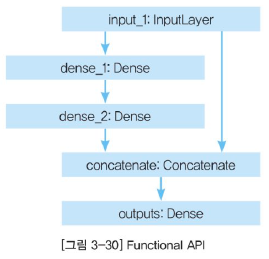

>함스의 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 return 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조 등 가능

* Sequential API를 사용하는 경우 단방향의 Sequential 모델만 구현할 수 있다는 제약 존재<br/>
(데이터 흐름이 특정 레이어를 건너뛰거나 병합, 분리 등의 구조 모델 구현 불가)

In [ ]:
# 기존에 Sequential API로 구현한 mnist 분류기 모델을 함수형 API로 동일하게 구현
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.dataset.mnist

* 함수형 API를 사용하기 위해 먼저 input 레이어 정의.
* input 레이어에 데이터의 입력 shape를 정의하고 레이어마다 반환되는 출력값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결
* 이렇게 여러 개의 레이어를 마치 체인 구조로 입출력 계속 연결

In [23]:
# 모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu',name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu',name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax',name='OutputLayer')(x3)

* 레이어마다 name 매개변수로 이름 부여 가능. 모델 인스턴스에 대하여 summary()로 요약 출력 시 이름 함께 출력됨

In [24]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


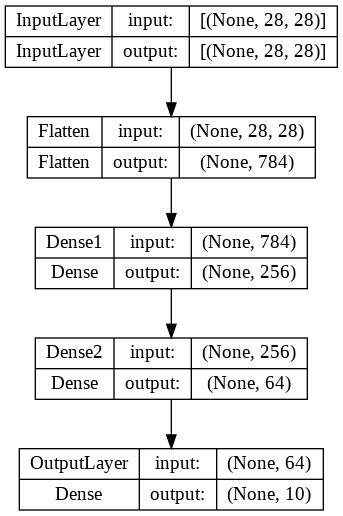

In [25]:
# 복잡한 구조를 가지는 모델 생성 시 시각화에 summary() 대신 plot_model 활용
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [27]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train,y_train,epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test,y_test,verbose=0)
print(f'Functional Model] loss:{loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2759 - accuracy: 0.8075
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3377 - accuracy: 0.9170
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2256 - accuracy: 0.9420
Functional Model] loss:0.19421, acc: 0.95040


### **7-2 모델 서브클래싱(Model Subclassing)**

>텐서플로 케라스는 model 클래스를 제공하고, 이를 기반으로 ㄹ딥러닝 모델 구현함. 이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 생성 가능.

In [28]:
# model subclassing으로 모델 인스턴스를 생성하기 위해 tf.keras.Model을 상속받아
# 생성하고자 하는 모델 클래스 구현
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64,activation='relu')
    self.dense3 = tf.keras.layers.Dense(10,activation='softmax')
  
  # moethod overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

* call() 함수를 메소드 오버라이딩으로 구현

In [30]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_28 (Dense)            multiple                  200960    
                                                                 
 dense_29 (Dense)            multiple                  16448     
                                                                 
 dense_30 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


* tf.keras.Model을 상속받아 구현한 모델인 MyModel을 생성자로 인스턴스 생성.

In [31]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train,y_train,epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss:{loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2162 - accuracy: 0.8259
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3213 - accuracy: 0.9180
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2176 - accuracy: 0.9425
Subclassing Model] loss:0.19478, acc: 0.95320


### **7-3 서브클래싱 모델 파라미터를 활용한 생성**

* Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점

In [33]:
# 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제
class MyModel(tf.keras.Model):

  #생성자 파라미터 추가
  def __init__(self,units,num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation = 'relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
  
  # class overiding
  # 훈련용 함수 저의
  # x는 input
  def call(self,x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [34]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         multiple                  0         
                                                                 
 dense_31 (Dense)            multiple                  200960    
                                                                 
 dense_32 (Dense)            multiple                  16448     
                                                                 
 dense_33 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train,y_train,epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss:{loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5422 - accuracy: 0.8493
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3183 - accuracy: 0.9194
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2134 - accuracy: 0.9442
Subclassing Model w.parameters] loss:0.20726, acc: 0.94480
